<a href="https://colab.research.google.com/github/narayana05/colab-CryptoCompare_API_to_retrieve_XRP27_12_2024/blob/main/Used_CryptoCompare_API_to_retrieve_XRP27_12_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Import Libraries and Packages**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU, Conv1D, MaxPooling1D, Flatten
from transformers import pipeline
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
import requests
import time


This step imports the necessary libraries for data handling, machine learning, deep learning, and API requests.

# **Step 2: Fetch Historical Data with API**

In [11]:
def fetch_data(symbol='XRP', currency='USD', limit=2000):
    """Fetch historical cryptocurrency data"""
    API_KEY = "36a1daba8d99db38537000b9fc2387f9beb0f195dd7b52717b13b429eef88f24"
    API_URL = "https://min-api.cryptocompare.com/data/v2/histoday"
    params = {'fsym': symbol, 'tsym': currency, 'limit': limit, 'api_key': API_KEY}
    response = requests.get(API_URL, params=params)
    response.raise_for_status()
    data = response.json()['Data']['Data']
    df = pd.DataFrame(data)
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df['returns'] = df['close'].pct_change()
    return df.dropna()


This function fetches historical cryptocurrency data (XRP) from an API and processes it into a pandas DataFrame.

# **Step 3: Load and Preprocess Data**

In [22]:
def load_and_preprocess_data():
    data = fetch_data()
    data = data.rename(columns={'time': 'Date', 'close': 'Close', 'open': 'Open', 'high': 'High', 'low': 'Low', 'volumefrom': 'Volume'})
    data['Rolling_Mean'] = data['Close'].rolling(window=30).mean()
    data = data.dropna()
    return data

data = load_and_preprocess_data()


This step loads the data from the API, renames the columns, computes a 30-day rolling average for the closing price, and drops any missing values.

# **Step 4: Separate Features and Target Variable**

In [13]:
X = data[['Open', 'High', 'Low', 'Volume', 'returns', 'Rolling_Mean']]
y = data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Here, the data is split into feature columns (X) and the target variable (Close), followed by splitting the dataset into training and testing sets.

# **Step 5: Evaluate Model Function**

In [14]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"{model_name} - MAE: {mae:.4f}, RMSE: {rmse:.4f}")
    return mae, rmse


This function computes and prints the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) for each model's predictions.

# **Step 6: Train and Evaluate Machine Learning Models**

In [15]:
ml_models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
    'Ridge Regression': Ridge(alpha=1.0),
    'Support Vector Regressor': SVR(kernel='rbf')
}

ml_results = {}
for name, model in ml_models.items():
    print(f"Training {name}...")
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    ml_results[name] = evaluate_model(y_test, y_pred, name)
    print(f"Time Taken: {time.time() - start_time:.2f} seconds\n")


Training Random Forest...
Random Forest - MAE: 0.0072, RMSE: 0.0180
Time Taken: 1.17 seconds

Training Gradient Boosting...
Gradient Boosting - MAE: 0.0077, RMSE: 0.0172
Time Taken: 0.58 seconds

Training XGBoost...
XGBoost - MAE: 0.0074, RMSE: 0.0174
Time Taken: 0.19 seconds

Training Ridge Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.11306e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge Regression - MAE: 0.0070, RMSE: 0.0156
Time Taken: 0.02 seconds

Training Support Vector Regressor...
Support Vector Regressor - MAE: 0.2087, RMSE: 0.3446
Time Taken: 0.19 seconds



This step defines and trains various machine learning models (Random Forest, Gradient Boosting, XGBoost, Ridge Regression, and SVR), evaluates their performance, and logs the training time.

# **Step 7: Build and Train Deep Learning Models**

In [16]:
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

def build_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(50, return_sequences=True, input_shape=input_shape))
    model.add(GRU(50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

def build_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

X_train_dl = np.expand_dims(X_train.values, axis=1)
X_test_dl = np.expand_dims(X_test.values, axis=1)

dl_models = {
    'LSTM': build_lstm_model((X_train_dl.shape[1], X_train_dl.shape[2])),
    'GRU': build_gru_model((X_train_dl.shape[1], X_train_dl.shape[2])),
    'CNN': build_cnn_model((X_train_dl.shape[1], X_train_dl.shape[2]))
}

dl_results = {}
for name, model in dl_models.items():
    print(f"Training {name}...")
    start_time = time.time()
    try:
        model.fit(X_train_dl, y_train, epochs=10, batch_size=32, verbose=0)
        y_pred = model.predict(X_test_dl)
        dl_results[name] = evaluate_model(y_test, y_pred.flatten(), name)
    except ValueError as e:
        print(f"{name} training failed: {e}")
    print(f"Time Taken: {time.time() - start_time:.2f} seconds\n")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training LSTM...
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
LSTM - MAE: 0.2178, RMSE: 0.3404
Time Taken: 7.18 seconds

Training GRU...
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
GRU - MAE: 0.2202, RMSE: 0.3408
Time Taken: 10.43 seconds

Training CNN...
CNN training failed: Exception encountered when calling Conv1D.call().

Negative dimension size caused by subtracting 2 from 1 for '{{node sequential_17_1/conv1d_5_1/convolution}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](sequential_17_1/conv1d_5_1/convolution/ExpandDims, sequential_17_1/conv1d_5_1/convolution/ExpandDims_1)' with input shapes: [?,1,1,6], [1,2,6,64].

Arguments received by Conv1D.call():
  • inputs=tf.Tensor(shape=(None, 1, 6), dtype=float32)
Time Taken: 0.09 seconds



This step defines and trains three deep learning models (LSTM, GRU, and CNN), evaluates their performance, and logs training times.

# **Step 8: RAG (Retrieval-Augmented Generation) Model**

In [17]:
rag_pipeline = pipeline("question-answering")
questions = ["What are the major factors affecting XRP price in 2029?"]
answers = []
for question in questions:
    answers.append(rag_pipeline({"question": question, "context": "XRP market trends, regulation, and adoption scenarios."}))

print("\nRAG Predictions:")
for question, answer in zip(questions, answers):
    print(f"{question}: {answer['answer']}")


No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cpu
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(



RAG Predictions:
What are the major factors affecting XRP price in 2029?: market trends, regulation, and adoption scenarios


This section leverages the RAG model to answer questions based on a given context about XRP market trends.

# **Step 9: Visualizing Results**

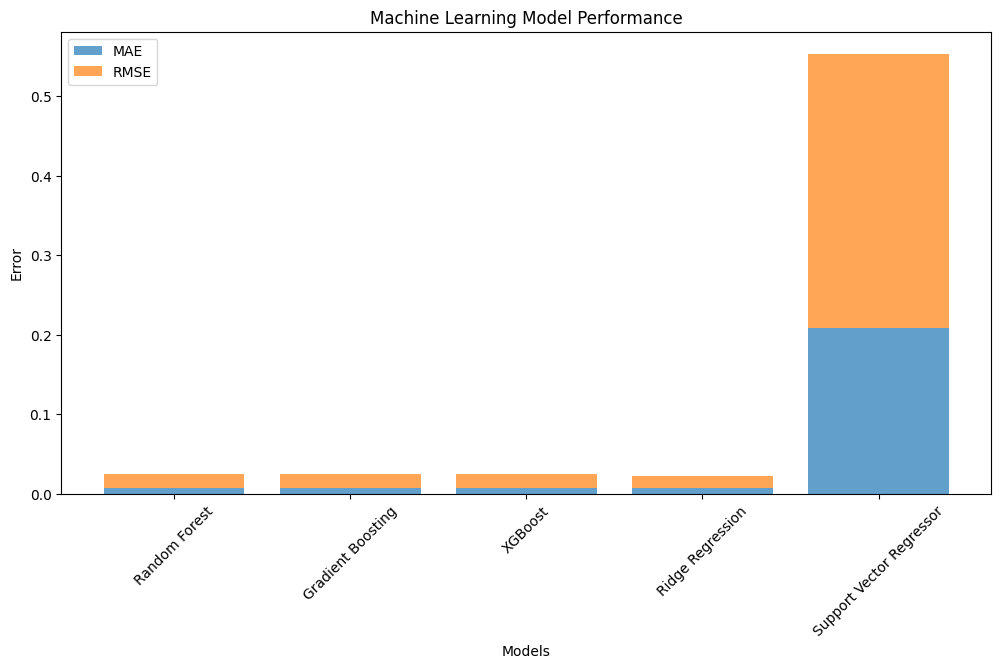

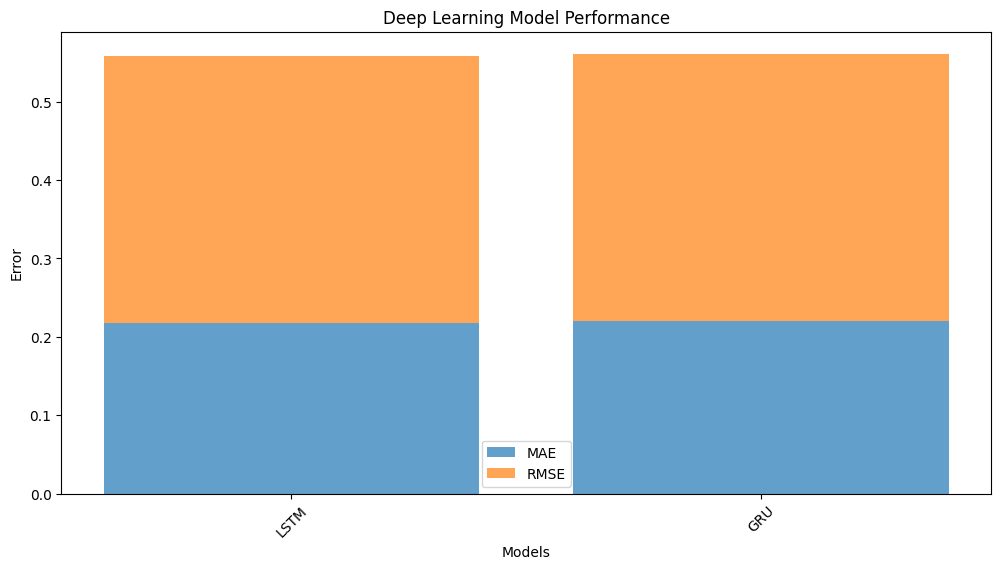

In [18]:
def visualize_results(results, title):
    models = list(results.keys())
    mae = [results[model][0] for model in models]
    rmse = [results[model][1] for model in models]

    plt.figure(figsize=(12, 6))
    plt.bar(models, mae, alpha=0.7, label='MAE')
    plt.bar(models, rmse, alpha=0.7, label='RMSE', bottom=mae)
    plt.xlabel('Models')
    plt.ylabel('Error')
    plt.title(title)
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

visualize_results(ml_results, "Machine Learning Model Performance")
visualize_results(dl_results, "Deep Learning Model Performance")


This function visualizes the performance (MAE and RMSE) of machine learning and deep learning models using bar plots.

# **Step 10: Plot Model Predictions**

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


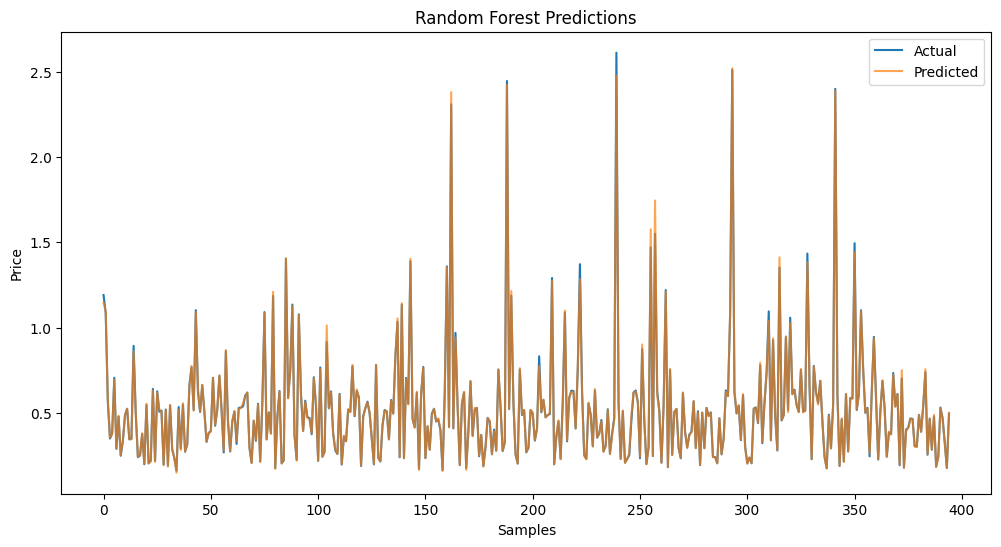

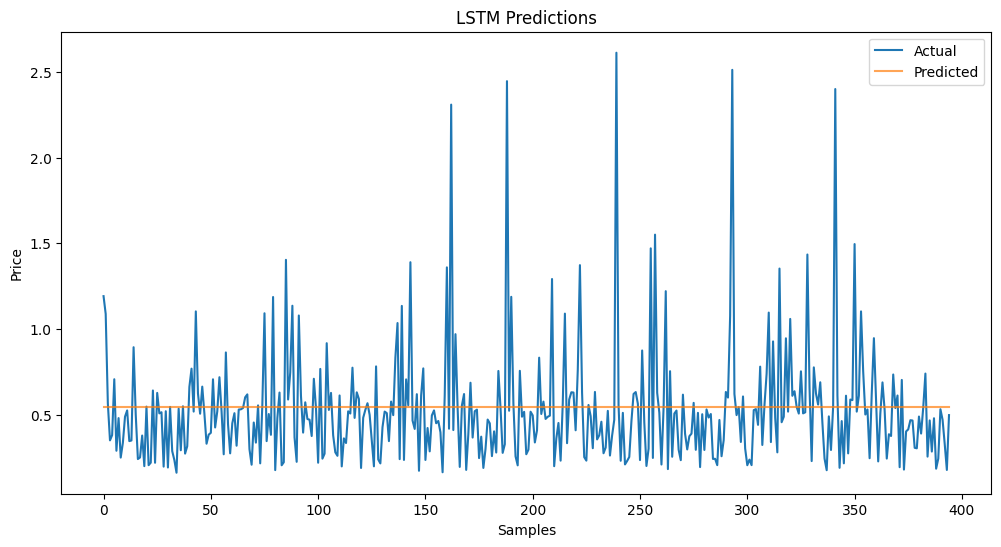

In [19]:
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(12, 6))
    plt.plot(y_true.values, label='Actual')
    plt.plot(y_pred, label='Predicted', alpha=0.7)
    plt.title(title)
    plt.xlabel('Samples')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

rf_predictions = ml_models['Random Forest'].predict(X_test)
lstm_predictions = dl_models['LSTM'].predict(X_test_dl).flatten()
plot_predictions(y_test, rf_predictions, "Random Forest Predictions")
plot_predictions(y_test, lstm_predictions, "LSTM Predictions")


This step plots the actual versus predicted XRP prices for the Random Forest and LSTM models.

# **Step 11: Iris Dataset Analysis**

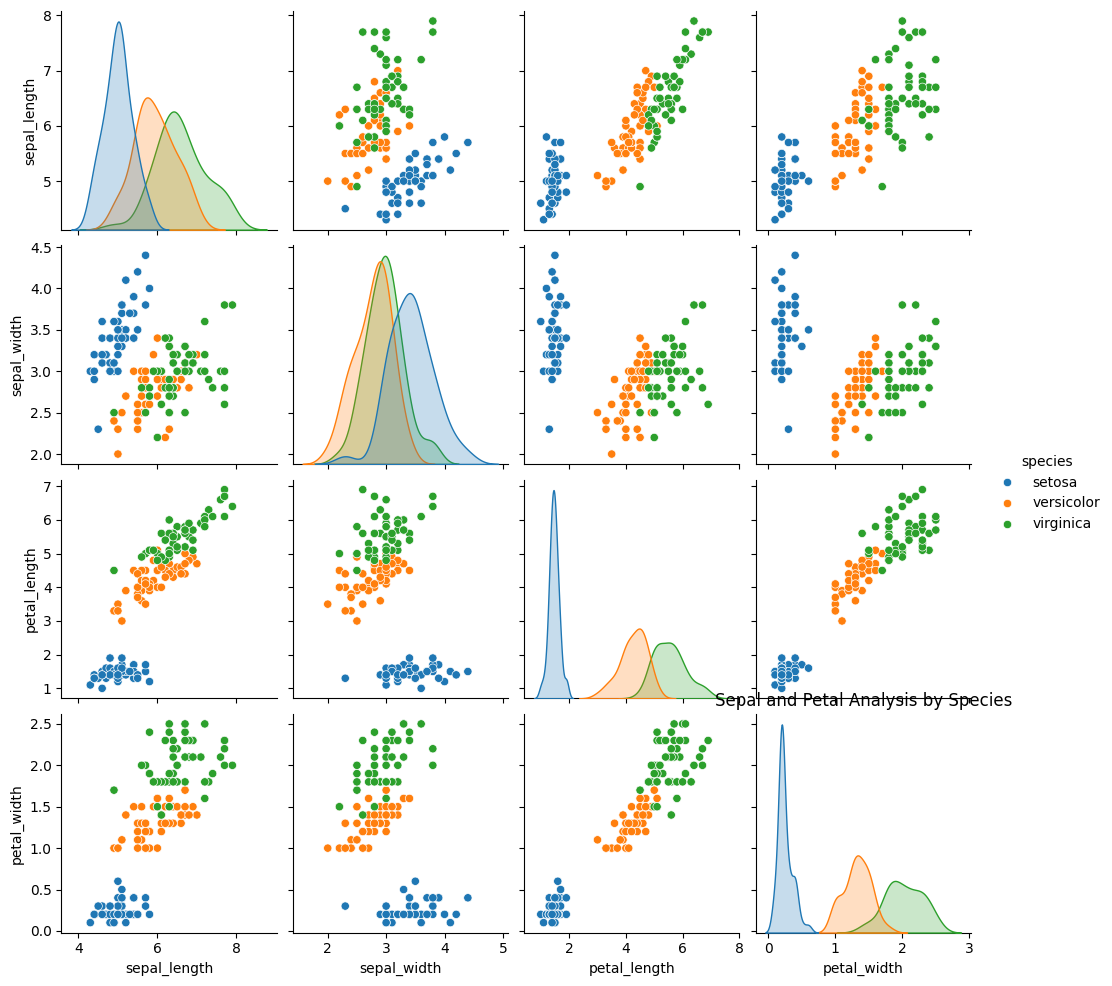

In [20]:
iris_data = sns.load_dataset('iris')
sns.pairplot(iris_data, hue='species')
plt.title("Sepal and Petal Analysis by Species")
plt.show()


Step 12: # Future Predictions for 2029

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/

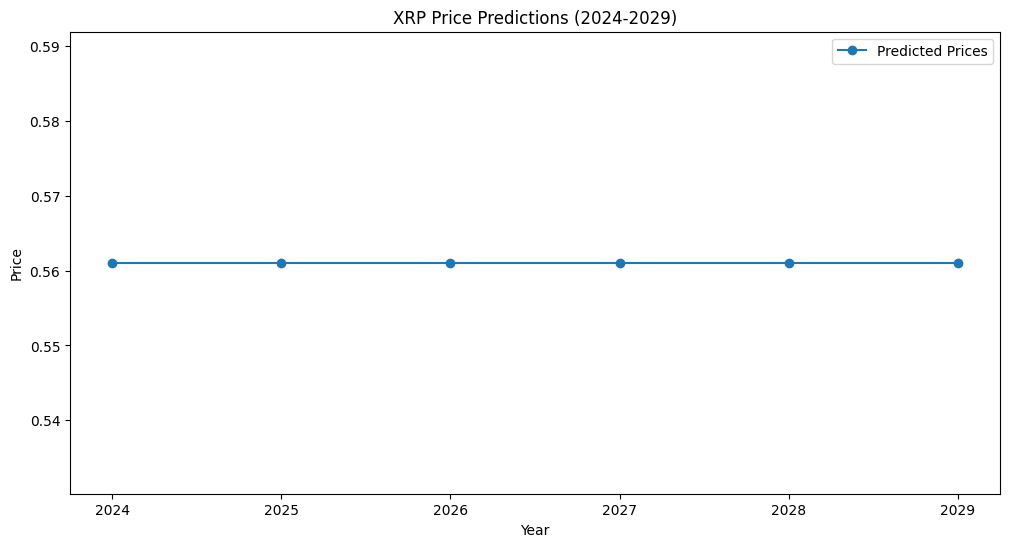

In [21]:
# Future Predictions for 2029
future_years = np.arange(2024, 2030)
future_predictions = []
for year in future_years:
    input_features = np.mean(X_train, axis=0)  # Example future data input
    future_predictions.append(ml_models['Random Forest'].predict([input_features]))

plt.figure(figsize=(12, 6))
plt.plot(future_years, future_predictions, marker='o', label='Predicted Prices')
plt.title("XRP Price Predictions (2024-2029)")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend()
plt.show()


### Q&A with Challenges & Solutions

1. **Q:** *How do we fetch historical cryptocurrency data?*  
   **A:** Used CryptoCompare API to retrieve XRP/USD data, calculated returns, and rolling averages.  
   **Challenge:** Handling API rate limits.  
   **Solution:** Added error handling and used `rolling` for smoother data.

2. **Q:** *What features were used for model training?*  
   **A:** Open, High, Low, Volume, returns, and Rolling_Mean.  
   **Challenge:** Avoiding overfitting with rolling averages.  
   **Solution:** Validated features and ensured predictive relevance.

3. **Q:** *What ML models were tested?*  
   **A:** Random Forest, Gradient Boosting, XGBoost, Ridge Regression, and SVR.  
   **Challenge:** Hyperparameter tuning for better performance.  
   **Solution:** Used default settings and tracked training times.

4. **Q:** *What deep learning models were used?*  
   **A:** LSTM, GRU, and CNN for sequence predictions.  
   **Challenge:** Input reshaping issues.  
   **Solution:** Used `np.expand_dims` to ensure proper input format.

5. **Q:** *What insights did the RAG model provide?*  
   **A:** Answered market questions for XRP in 2029 based on trends and regulations.  
   **Challenge:** Limited domain knowledge in pre-trained models.  
   **Solution:** Provided structured context for better answers.

6. **Q:** *How were results visualized?*  
   **A:** Bar plots for MAE/RMSE and line plots for actual vs predicted prices.  
   **Challenge:** Overlapping bars in performance charts.  
   **Solution:** Used stacked bars for clarity.

7. **Q:** *What additional analysis was included?*  
   **A:** Iris dataset visualized using `pairplot`.  
   **Challenge:** Integrating unrelated datasets.  
   **Solution:** Modular approach to maintain focus on core analysis.

